In [4]:
######################################################
##########  Classification model #####################
######################################################

import pandas as pd
import numpy as np

churn_df = pd.read_csv("telecom_churn_clean.csv")
churn_df.head(5)

#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier   

#Scikit-learn requires that the feature X are in an array
#target y is also an array with a single column and same number of observations
#use .values to convert X and y in NumPy arrays
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)


(3333, 2) (3333,)


In [5]:
#Create a KNN classifier (the model) with 15 neighbors
knn = KNeighborsClassifier(n_neighbors = 15)

#Fit the classifier (the model) to the data
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],[24.4, 24.1],[50.1, 10.9]])
print(X_new.shape)  #2D NumPy array


(3, 2)


In [6]:
#Predict the lablels (target values) for the unseen features X_new
predictions = knn.predict(X_new)

#print('Predictions: {}'.format(predictions))
print('Predictions:', predictions)


Predictions: [1 0 0]


In [7]:
######################################################
##### Model Performance ##############################
######################################################
## In Classification, ACCURACY is the metric used.
# Accuracy = correct predictions / Total observations

# Split data in Training set and Testing set
#Fit/train classifier (model) on training set
#Calculate Accuracy using test set

# Import the module
from sklearn.model_selection import train_test_split

# Split into training and test sets =30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.872


In [8]:
########################
### Model Complexity
### Over/underfitting
########################

# Array containing a range of k values
neighbors = np.arange(1, 26)
train_accuracies = {}
test_accuracies = {}

#We use a for loop to repeat our previous workflow, 
#building several models using a different number of neighbors. 
#We loop through our neighbors array and, inside the loop, 
#we instantiate a KNN model with n_neighbors equal to the neighbor iterator, 
#and fit to the training data. We then calculate training and test set accuracy, 
#storing the results in their respective dictionaries.

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541} 
 {1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


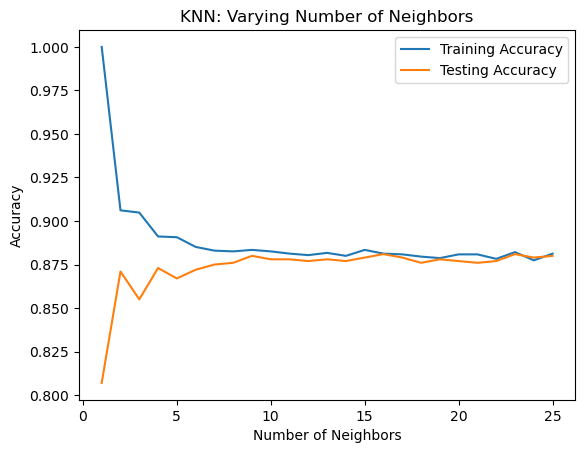

In [9]:
###############################################
# Visualisation model complexity curve
###############################################
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

#As k increases beyond 15 we see underfitting 
#where accuracy plateaus on both test and training sets
#The peak test accuracy occurs at around 13 neighbors.

In [12]:
###########################################
# Confusion matrix in scikit learn
###########################################

from sklearn.metrics import classification_report, confusion_matrix
knn =  KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(knn.score(X_test, y_test)) #Accuracy

# Four metrics can be useful to evaluate the performance of the classification model
# Accuracy, Precision, Recall(sensitivity), F1-score

#Here, the model has a poorly recall on the churn class 0.28

[[1111   27]
 [ 142   54]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334

0.8733133433283359
